In [1]:
import pandas as pd
import numpy as np

# 1. Učitati skup podataka 

In [2]:
bank=pd.read_csv('/Users/boris/Documents/GitHub/boris-python/bank-additional.csv',delimiter=';')

# 2. Prikazati deskriptivnu statistiku skupa podataka (tipovi podataka, rasponi vrednosti, nedostajuće vrednosti itd.)

In [3]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3.0,999,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4.0,999,0.0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1.0,999,1.0,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no


In [4]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4117.000000,4117.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.486358,4.858993
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.639840,79.432456
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,1.266000,5099.100000


In [5]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays               int64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed        object
y                  object
dtype: object

In [6]:
bank.select_dtypes(include=['object']).describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,nr.employed,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,12,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,5228.1,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,1625,3667


In [7]:
bank.shape

(4119, 21)

In [8]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 1
dtype: int64

# 3. Pripremiti skup podataka tako da bude pogodan za prediktivno modelovanje

In [9]:
bank1=bank.dropna(axis=0,subset=['y'],how='any')

In [10]:
bank1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 0
dtype: int64

In [11]:
bank.dropna(axis=0,subset=['y'],inplace=True)

In [12]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 0
dtype: int64

In [13]:
bank.drop(['contact','duration', 'nr.employed'], axis=1, inplace=True)

In [14]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
month             0
day_of_week       0
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
y                 0
dtype: int64

In [15]:
mean_campaign=np.mean(bank.campaign.dropna())

In [16]:
mean_campaign

2.533916849015317

In [17]:
bank.campaign.fillna(round(mean_campaign), inplace=True)

In [18]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
month             0
day_of_week       0
campaign          0
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
y                 0
dtype: int64

In [19]:
bank['cons.price.idx'].fillna(round(np.mean(bank['cons.price.idx'].dropna())), inplace=True)
bank['cons.conf.idx'].fillna(round(np.mean(bank['cons.conf.idx'].dropna())), inplace=True)
bank['euribor3m'].fillna(round(np.mean(bank['euribor3m'].dropna())), inplace=True)

In [20]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
month             0
day_of_week       0
campaign          0
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
dtype: int64

In [21]:
bank.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [22]:
bank['contacted'] = np.where(bank['pdays']==999, 0, 1)

In [23]:
bank.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,contacted
0,30,blue-collar,married,basic.9y,no,yes,no,may,fri,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,no,0
1,39,services,single,high.school,no,no,no,may,fri,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,no,0
2,25,services,married,high.school,no,yes,no,jun,wed,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,no,0
3,38,services,married,basic.9y,no,unknown,unknown,jun,fri,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,no,0
4,47,admin.,married,university.degree,no,yes,no,nov,mon,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,no,0


In [24]:
bank.drop(['pdays','previous', 'poutcome','emp.var.rate'], axis=1, inplace=True)

In [25]:
bank.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted
0,30,blue-collar,married,basic.9y,no,yes,no,may,fri,2.0,92.893,-46.2,1.313,no,0
1,39,services,single,high.school,no,no,no,may,fri,4.0,93.994,-36.4,4.855,no,0
2,25,services,married,high.school,no,yes,no,jun,wed,1.0,94.465,-41.8,4.962,no,0
3,38,services,married,basic.9y,no,unknown,unknown,jun,fri,3.0,94.465,-41.8,4.959,no,0
4,47,admin.,married,university.degree,no,yes,no,nov,mon,1.0,93.200,-42.0,4.191,no,0


In [26]:
bank['y'] = np.where(bank['y']=='no', 0, 1)

In [27]:
bank.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted
0,30,blue-collar,married,basic.9y,no,yes,no,may,fri,2.0,92.893,-46.2,1.313,0,0
1,39,services,single,high.school,no,no,no,may,fri,4.0,93.994,-36.4,4.855,0,0
2,25,services,married,high.school,no,yes,no,jun,wed,1.0,94.465,-41.8,4.962,0,0
3,38,services,married,basic.9y,no,unknown,unknown,jun,fri,3.0,94.465,-41.8,4.959,0,0
4,47,admin.,married,university.degree,no,yes,no,nov,mon,1.0,93.200,-42.0,4.191,0,0


In [28]:
dummies=pd.get_dummies(bank[['housing', 'loan']])

In [29]:
dummies.head()

,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,0,0,1,1,0,0
1,1,0,0,1,0,0
2,0,0,1,1,0,0
3,0,1,0,0,1,0
4,0,0,1,1,0,0


In [30]:
bank_prepared=bank.join(dummies)

In [31]:
bank_prepared.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,...,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,30,blue-collar,married,basic.9y,no,yes,no,may,fri,2.0,...,-46.2,1.313,0,0,0,0,1,1,0,0
1,39,services,single,high.school,no,no,no,may,fri,4.0,...,-36.4,4.855,0,0,1,0,0,1,0,0
2,25,services,married,high.school,no,yes,no,jun,wed,1.0,...,-41.8,4.962,0,0,0,0,1,1,0,0
3,38,services,married,basic.9y,no,unknown,unknown,jun,fri,3.0,...,-41.8,4.959,0,0,0,1,0,0,1,0
4,47,admin.,married,university.degree,no,yes,no,nov,mon,1.0,...,-42.0,4.191,0,0,0,0,1,1,0,0


# 4. Podelite skup podataka na trening i test u odnosu 70:30

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
RF=RandomForestClassifier(n_estimators=50)

In [35]:
numerical=bank_prepared.select_dtypes(exclude=['object'])

In [36]:
numerical.describe()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
count,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000
mean,40.115590,2.534483,93.579911,-40.496260,3.621509,0.109519,0.038854,0.446333,0.025498,0.528169,0.813259,0.025498,0.161243
std,10.313839,2.565376,0.579346,4.593417,1.733217,0.312327,0.193270,0.497172,0.157651,0.499266,0.389751,0.157651,0.367800
min,18.000000,1.000000,92.201000,-50.800000,0.635000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,93.075000,-42.700000,1.334000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,2.000000,93.749000,-41.800000,4.857000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,47.000000,3.000000,93.994000,-36.400000,4.961000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,88.000000,35.000000,94.767000,-26.900000,5.045000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
y=bank.y

In [38]:
X=numerical.drop('y', axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [40]:
bi_skup=bank.select_dtypes(exclude=['object'])

In [189]:
bi_skup.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted
0,30,2.0,92.893,-46.2,1.313,0,0
1,39,4.0,93.994,-36.4,4.855,0,0
2,25,1.0,94.465,-41.8,4.962,0,0
3,38,3.0,94.465,-41.8,4.959,0,0
4,47,1.0,93.200,-42.0,4.191,0,0


In [42]:
y_bi=bi_skup.y

In [43]:
X_bi=bi_skup.drop('y', axis=1)

In [44]:
X_bi_train, X_bi_test, y_bi_train, y_bi_test = train_test_split(X_bi,y_bi, test_size=0.3, random_state=100)

In [45]:
RF=RandomForestClassifier(n_estimators=50)

In [46]:
rf_model_bi=RF.fit(X_bi_train, y_bi_train)

In [47]:
predictions_test_bi=rf_model_bi.predict(X_bi_test)
predictions_train_bi=rf_model_bi.predict(X_bi_train)

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [49]:
roc_auc_score(y_bi_train, predictions_train_bi)

0.91919409401263374

In [50]:
roc_auc_score(y_bi_test, predictions_test_bi)

0.62151203227152585

# 5. Kreirajte minimalno 2 prediktivna modela (sa default parametrima) i ocenite gresku na test setu (minimum 2 mere evaluacije)

In [51]:
#Prvi model

In [52]:
RF=RandomForestClassifier(n_estimators=50)

In [53]:
X_train.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
1884,41,2.0,93.918,-42.7,4.962,0,1,0,0,1,0,0
3880,40,2.0,94.465,-41.8,4.865,0,0,0,1,1,0,0
3340,29,1.0,92.893,-46.2,1.281,1,1,0,0,1,0,0
2667,47,1.0,93.994,-36.4,4.856,0,1,0,0,1,0,0
990,37,6.0,93.918,-42.7,4.955,0,0,0,1,1,0,0


In [54]:
X_bi_train.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,contacted
1884,41,2.0,93.918,-42.7,4.962,0
3880,40,2.0,94.465,-41.8,4.865,0
3340,29,1.0,92.893,-46.2,1.281,1
2667,47,1.0,93.994,-36.4,4.856,0
990,37,6.0,93.918,-42.7,4.955,0


In [55]:
rf_model=RF.fit(X_train, y_train)

In [56]:
X_train.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
1884,41,2.0,93.918,-42.7,4.962,0,1,0,0,1,0,0
3880,40,2.0,94.465,-41.8,4.865,0,0,0,1,1,0,0
3340,29,1.0,92.893,-46.2,1.281,1,1,0,0,1,0,0
2667,47,1.0,93.994,-36.4,4.856,0,1,0,0,1,0,0
990,37,6.0,93.918,-42.7,4.955,0,0,0,1,1,0,0


In [57]:
# atributi koji imaju najveću prediktivnu moć
rf_model.feature_importances_

array([ 0.31475379,  0.10477333,  0.06687376,  0.08010612,  0.31077896,
        0.06002897,  0.0173925 ,  0.00168838,  0.01913559,  0.01216827,
        0.00197724,  0.01032309])

In [58]:
rf_model.predict_proba(X_test)

array([[ 1.   ,  0.   ],
       [ 0.34 ,  0.66 ],
       [ 0.913,  0.087],
       ..., 
       [ 0.94 ,  0.06 ],
       [ 1.   ,  0.   ],
       [ 0.9  ,  0.1  ]])

In [59]:
predictions_test=rf_model.predict(X_test)
predictions_train=rf_model.predict(X_train)

In [60]:
path=rf_model.decision_path(X_test)

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [62]:
roc_auc_score(y_train, predictions_train)

0.96203111372237049

In [63]:
len(y_test)

1236

In [64]:
len(predictions_test)

1236

In [65]:
roc_auc_score(y_test, predictions_test)

0.60499374043677845

In [66]:

probas=rf_model.predict_proba(X_test)[:,1]

In [67]:
print(probas)

[ 0.     0.66   0.087 ...,  0.06   0.     0.1  ]


In [68]:

fpr, tpr, thresholds = roc_curve(y_test, probas)

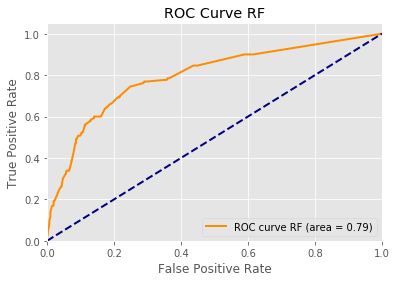

In [69]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#y_predict_probabilities = model.predict_proba(X_test)[:,1]

#fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve RF (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc="lower right")
plt.show()

In [70]:
accuracy_score(y_train, predictions_train)

0.99063150589868143

In [71]:
accuracy_score(y_test, predictions_test)

0.88834951456310685

In [72]:
average_precision_score(y_train, predictions_train) 

0.92430885872349811

In [73]:
average_precision_score(y_test, predictions_test) 

0.18868973529167704

In [74]:
recall_score(y_train, predictions_train)

0.92523364485981308

In [75]:
recall_score(y_test, predictions_test)

0.24615384615384617

In [76]:
#Drugi model

In [77]:
from sklearn.linear_model import LogisticRegression 

In [78]:
LR = LogisticRegression()

In [79]:
LR_model=LR.fit(X_train, y_train)

In [80]:
LR_model.predict_proba(X_test)

array([[ 0.98449331,  0.01550669],
       [ 0.82286146,  0.17713854],
       [ 0.94247132,  0.05752868],
       ..., 
       [ 0.9778611 ,  0.0221389 ],
       [ 0.92984315,  0.07015685],
       [ 0.96840631,  0.03159369]])

In [81]:
predictions_test_LR=LR_model.predict(X_test)
predictions_train_LR=LR_model.predict(X_train)

In [82]:
roc_auc_score(y_train, predictions_train_LR)

0.59577523382732356

In [83]:
roc_auc_score(y_test, predictions_test_LR)

0.57964250938934492

In [84]:
probas_LR=LR_model.predict_proba(X_test)[:,1]

In [85]:
fp, tp, thresholds = roc_curve(y_test, probas_LR)

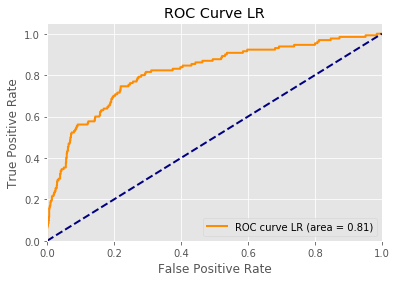

In [86]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#y_predict_probabilities = model.predict_proba(X_test)[:,1]

#fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc_LR = auc(fp, tp)

plt.figure()
plt.plot(fp, tp, color='darkorange',
         lw=2, label='ROC curve LR (area = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LR')
plt.legend(loc="lower right")
plt.show()

In [194]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, probas_LR)

Text(0.5,1,'2-class Precision-Recall curve: AP=0.44')

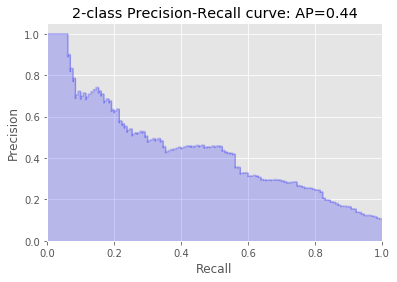

In [195]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, probas_LR)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [87]:
accuracy_score(y_train, predictions_train_LR)

0.899028452463567

In [88]:
accuracy_score(y_test, predictions_test_LR)

0.90372168284789645

In [89]:
average_precision_score(y_train, predictions_train_LR) 

0.22152035400863507

In [90]:
average_precision_score(y_test, predictions_test_LR) 

0.20019915359721185

In [91]:
recall_score(y_train, predictions_train_LR)

0.20560747663551401

In [92]:
recall_score(y_test, predictions_test_LR)

0.16923076923076924

# 6. Optimizujte minimalno 2 parametra svakog od prediktivnih modela (isti kao pod 4) i ocenite gresku na test setu

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
scores = cross_val_score(RF, X_train, y_train, cv=5, scoring='roc_auc')

In [95]:
np.average(scores)

0.70841666256653923

In [96]:
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
scores_test = cross_val_score(RF, X_test, y_test, cv=5, scoring='roc_auc')

In [98]:
scores_test

array([ 0.75407138,  0.8096937 ,  0.71310477,  0.77149321,  0.70631744])

In [99]:
np.average(scores_test)

0.75093609969175579

In [100]:
scores_LR = cross_val_score(LR, X_train, y_train, cv=5, scoring='recall')

In [101]:
np.average(scores_LR)

0.2055769230769231

In [102]:
scores_LR_roc_auc = cross_val_score(LR, X_train, y_train, cv=10, scoring='roc_auc')

In [103]:
np.average(scores_LR_roc_auc)

0.73308597794541652

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
#prvi model (RF)

In [106]:
params = [
  {'n_estimators': [75, 200, 400, 500, 600], 'max_depth': [3, 5, 10]}
 ]

In [107]:
optimizer = GridSearchCV(RF, 
                   param_grid=params, 
                   scoring='roc_auc', cv=10,  
                   return_train_score=True, 
                   refit='roc_auc', n_jobs=-1)

In [108]:
opt_rf=optimizer.fit(X_train,y_train)

In [109]:
opt_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
predictions_opt=opt_rf.predict(X_train)

In [111]:
roc_auc_score(y_train, predictions_opt)

0.62421586194061163

In [112]:
predictions_opt_test=opt_rf.predict(X_test)

In [113]:
roc_auc_score(y_test, predictions_opt_test)

0.5547572680484073

In [114]:
#drugi model (LR)

In [115]:
params_LR = [
  {'C': [0.3, 0.5, 1.0], 'max_iter': [50, 100, 150]}
 ]

In [116]:
optimizer_LR = GridSearchCV(LR, 
                   param_grid=params_LR, 
                   scoring='roc_auc', cv=10,  
                   return_train_score=True, 
                   refit='roc_auc', n_jobs=-1)

In [117]:
opt_LR=optimizer_LR.fit(X_train,y_train)

In [118]:
opt_LR.best_estimator_

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
predictions_opt_LR=opt_LR.predict(X_train)

In [120]:
roc_auc_score(y_train, predictions_opt_LR)

0.59597047006316894

In [121]:
opt_LR_test=optimizer_LR.fit(X_test,y_test)

In [122]:
opt_LR_test.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
predictions_opt_LR_test=opt_LR.predict(X_test)

In [124]:
roc_auc_score(y_test, predictions_opt_LR_test)

0.57828627069133409

In [125]:
bank.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted
0,30,blue-collar,married,basic.9y,no,yes,no,may,fri,2.0,92.893,-46.2,1.313,0,0
1,39,services,single,high.school,no,no,no,may,fri,4.0,93.994,-36.4,4.855,0,0
2,25,services,married,high.school,no,yes,no,jun,wed,1.0,94.465,-41.8,4.962,0,0
3,38,services,married,basic.9y,no,unknown,unknown,jun,fri,3.0,94.465,-41.8,4.959,0,0
4,47,admin.,married,university.degree,no,yes,no,nov,mon,1.0,93.200,-42.0,4.191,0,0


In [126]:
numerical.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,30,2.0,92.893,-46.2,1.313,0,0,0,0,1,1,0,0
1,39,4.0,93.994,-36.4,4.855,0,0,1,0,0,1,0,0
2,25,1.0,94.465,-41.8,4.962,0,0,0,0,1,1,0,0
3,38,3.0,94.465,-41.8,4.959,0,0,0,1,0,0,1,0
4,47,1.0,93.200,-42.0,4.191,0,0,0,0,1,1,0,0


In [127]:
numerical.describe()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
count,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000
mean,40.115590,2.534483,93.579911,-40.496260,3.621509,0.109519,0.038854,0.446333,0.025498,0.528169,0.813259,0.025498,0.161243
std,10.313839,2.565376,0.579346,4.593417,1.733217,0.312327,0.193270,0.497172,0.157651,0.499266,0.389751,0.157651,0.367800
min,18.000000,1.000000,92.201000,-50.800000,0.635000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,93.075000,-42.700000,1.334000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,2.000000,93.749000,-41.800000,4.857000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,47.000000,3.000000,93.994000,-36.400000,4.961000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,88.000000,35.000000,94.767000,-26.900000,5.045000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 7. Podelite inicijalni skup podataka na osnovu jednog kategoričkog atributa u datasetu i sačuvajte ih u posebnim promenljivim. Na svakom od skupova, trenirajte jedan model i uporedite rezultate po različitim skupovima 

In [128]:
bank.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted
0,30,blue-collar,married,basic.9y,no,yes,no,may,fri,2.0,92.893,-46.2,1.313,0,0
1,39,services,single,high.school,no,no,no,may,fri,4.0,93.994,-36.4,4.855,0,0
2,25,services,married,high.school,no,yes,no,jun,wed,1.0,94.465,-41.8,4.962,0,0
3,38,services,married,basic.9y,no,unknown,unknown,jun,fri,3.0,94.465,-41.8,4.959,0,0
4,47,admin.,married,university.degree,no,yes,no,nov,mon,1.0,93.200,-42.0,4.191,0,0


In [129]:
bank['quartal'] = 0

In [130]:
bank.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,quartal
0,30,blue-collar,married,basic.9y,no,yes,no,may,fri,2.0,92.893,-46.2,1.313,0,0,0
1,39,services,single,high.school,no,no,no,may,fri,4.0,93.994,-36.4,4.855,0,0,0
2,25,services,married,high.school,no,yes,no,jun,wed,1.0,94.465,-41.8,4.962,0,0,0
3,38,services,married,basic.9y,no,unknown,unknown,jun,fri,3.0,94.465,-41.8,4.959,0,0,0
4,47,admin.,married,university.degree,no,yes,no,nov,mon,1.0,93.200,-42.0,4.191,0,0,0


In [131]:
i=0
for row in bank["month"]:
    if row=="jan" or row=="feb" or row=="mar":  
        bank['quartal'][i]=1

    elif row=="apr" or row=="may" or row=="jun":
        bank['quartal'][i]=2

    elif row=="jul" or row=="aug" or row=="sep":  
        bank['quartal'][i]=3

    elif row=="oct" or row=="nov" or row=="dec":
        bank['quartal'][i]=4
    else:
        print(row)
        bank['quartal'][i]="greska"
    i+=1

/Users/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/boris/anaconda3/lib/python3.6/site-p

In [132]:
bank.head(5)

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,quartal
0,30,blue-collar,married,basic.9y,no,yes,no,may,fri,2.0,92.893,-46.2,1.313,0,0,2
1,39,services,single,high.school,no,no,no,may,fri,4.0,93.994,-36.4,4.855,0,0,2
2,25,services,married,high.school,no,yes,no,jun,wed,1.0,94.465,-41.8,4.962,0,0,2
3,38,services,married,basic.9y,no,unknown,unknown,jun,fri,3.0,94.465,-41.8,4.959,0,0,2
4,47,admin.,married,university.degree,no,yes,no,nov,mon,1.0,93.200,-42.0,4.191,0,0,4


In [133]:
numerical_quartal_0=bank.loc[:,'quartal']

In [134]:
numerical_quartal_0.head()

0    2
1    2
2    2
3    2
4    4
Name: quartal, dtype: int64

In [135]:
numerical_quartal=numerical.join(numerical_quartal_0)

In [136]:
numerical_quartal.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,quartal
0,30,2.0,92.893,-46.2,1.313,0,0,0,0,1,1,0,0,2
1,39,4.0,93.994,-36.4,4.855,0,0,1,0,0,1,0,0,2
2,25,1.0,94.465,-41.8,4.962,0,0,0,0,1,1,0,0,2
3,38,3.0,94.465,-41.8,4.959,0,0,0,1,0,0,1,0,2
4,47,1.0,93.200,-42.0,4.191,0,0,0,0,1,1,0,0,4


In [137]:
numerical_quartal.describe()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,quartal
count,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000
mean,40.115590,2.534483,93.579911,-40.496260,3.621509,0.109519,0.038854,0.446333,0.025498,0.528169,0.813259,0.025498,0.161243,2.591064
std,10.313839,2.565376,0.579346,4.593417,1.733217,0.312327,0.193270,0.497172,0.157651,0.499266,0.389751,0.157651,0.367800,0.726231
min,18.000000,1.000000,92.201000,-50.800000,0.635000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,93.075000,-42.700000,1.334000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,38.000000,2.000000,93.749000,-41.800000,4.857000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000
75%,47.000000,3.000000,93.994000,-36.400000,4.961000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000
max,88.000000,35.000000,94.767000,-26.900000,5.045000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [138]:
bankQ1= numerical_quartal.loc[numerical_quartal['quartal'] == 1]

In [139]:
bankQ1.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,quartal
21,39,1.0,93.369,-34.8,0.639,1,1,1,0,0,1,0,0,1
30,38,1.0,92.843,-50.0,1.687,0,0,0,0,1,0,0,1,1
178,27,1.0,93.369,-34.8,0.637,1,1,1,0,0,1,0,0,1
238,41,6.0,92.843,-50.0,1.778,1,0,1,0,0,1,0,0,1
315,29,1.0,93.369,-34.8,0.639,1,0,0,0,1,1,0,0,1


In [140]:
bankQ2 = numerical_quartal.loc[numerical_quartal['quartal'] == 2]

In [141]:
bankQ2.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,quartal
0,30,2.0,92.893,-46.2,1.313,0,0,0,0,1,1,0,0,2
1,39,4.0,93.994,-36.4,4.855,0,0,1,0,0,1,0,0,2
2,25,1.0,94.465,-41.8,4.962,0,0,0,0,1,1,0,0,2
3,38,3.0,94.465,-41.8,4.959,0,0,0,1,0,0,1,0,2
9,35,1.0,93.994,-36.4,4.855,0,0,1,0,0,1,0,0,2


In [142]:
bankQ3 = numerical_quartal.loc[numerical_quartal['quartal'] == 3]

In [143]:
bankQ3.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,quartal
5,32,3.0,94.199,-37.5,0.884,0,0,1,0,0,1,0,0,3
6,32,4.0,94.199,-37.5,0.879,0,0,0,0,1,1,0,0,3
10,25,1.0,93.918,-42.7,4.958,0,0,0,0,1,1,0,0,3
11,36,1.0,93.918,-42.7,4.968,0,0,1,0,0,1,0,0,3
15,27,2.0,93.918,-42.7,4.963,0,0,1,0,0,1,0,0,3


In [144]:
bankQ4 = numerical_quartal.loc[numerical_quartal['quartal'] == 4]

In [145]:
bankQ4.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,quartal
4,47,1.0,93.200,-42.0,4.191,0,0,0,0,1,1,0,0,4
7,41,2.0,93.200,-42.0,4.191,0,0,0,0,1,1,0,0,4
8,31,1.0,93.200,-42.0,4.153,0,0,1,0,0,1,0,0,4
37,46,1.0,93.200,-42.0,4.120,0,0,1,0,0,1,0,0,4
39,20,3.0,94.601,-49.5,0.977,0,0,1,0,0,1,0,0,4


In [146]:
#bankQ1

In [147]:
XQ1=bankQ1.drop('y',axis=1)

In [148]:
yQ1=bankQ1.y

In [149]:
X_trainQ1, X_testQ1, y_trainQ1, y_testQ1 = train_test_split(XQ1,yQ1, test_size=0.3, random_state=100)

In [150]:
RF=RandomForestClassifier(n_estimators=50)

In [187]:
rf_model=RF.fit(X_trainQ1, y_trainQ1)

In [188]:
rf_model.predict_proba(X_testQ1)

array([[ 0.94,  0.06],
       [ 0.94,  0.06],
       [ 0.88,  0.12],
       [ 0.96,  0.04],
       [ 0.88,  0.12],
       [ 0.98,  0.02],
       [ 0.5 ,  0.5 ],
       [ 0.88,  0.12],
       [ 0.96,  0.04],
       [ 0.98,  0.02],
       [ 0.44,  0.56],
       [ 0.96,  0.04],
       [ 0.66,  0.34],
       [ 0.86,  0.14],
       [ 0.94,  0.06]])

In [183]:
print(rf_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [153]:
predictions_test_Q1= rf_model.predict(X_testQ1)
predictions_train_Q1=rf_model.predict(X_trainQ1)

In [154]:
roc_auc_score(y_trainQ1, predictions_train_Q1)

1.0

In [155]:
roc_auc_score(y_testQ1, predictions_test_Q1)

0.5

In [156]:
recall_score(y_trainQ1, predictions_train_Q1)

1.0

In [157]:
recall_score(y_testQ1, predictions_test_Q1)

0.0

In [158]:
average_precision_score(y_trainQ1, predictions_train_Q1) 

1.0

In [159]:
average_precision_score(y_testQ1, predictions_test_Q1) 

0.20000000000000001

In [160]:
#bankQ2

In [161]:
XQ2=bankQ2.drop('y',axis=1)

In [162]:
yQ2=bankQ2.y

In [163]:
X_trainQ2, X_testQ2, y_trainQ2, y_testQ2 = train_test_split(XQ2,yQ2, test_size=0.3, random_state=100)

In [164]:
rf_model=RF.fit(X_trainQ2, y_trainQ2)

In [165]:
rf_model.predict_proba(X_testQ2)

array([[ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       ..., 
       [ 0.56,  0.44],
       [ 0.9 ,  0.1 ],
       [ 0.92,  0.08]])

In [166]:
predictions_test_Q2= rf_model.predict(X_testQ2)
predictions_train_Q2=rf_model.predict(X_trainQ2)

In [167]:
roc_auc_score(y_trainQ2, predictions_train_Q2)

0.97733050034533031

In [168]:
roc_auc_score(y_testQ2, predictions_test_Q2)

0.57019865664845171

In [169]:
recall_score(y_trainQ2, predictions_train_Q2)

0.95541401273885351

In [170]:
recall_score(y_testQ2, predictions_test_Q2)

0.18032786885245902

In [171]:
average_precision_score(y_trainQ2, predictions_train_Q2) 

0.95380057233518234

In [172]:
average_precision_score(y_testQ2, predictions_test_Q2) 

0.13683430497041188

In [173]:
#bankQ3

In [174]:
XQ3=bankQ3.drop('y',axis=1)
yQ3=bankQ3.y
X_trainQ3, X_testQ3, y_trainQ3, y_testQ3 = train_test_split(XQ3,yQ3, test_size=0.3, random_state=100)
rf_model=RF.fit(X_trainQ3, y_trainQ3)
rf_model.predict_proba(X_testQ3)
predictions_test_Q3= rf_model.predict(X_testQ3)
predictions_train_Q3=rf_model.predict(X_trainQ3)
roc_auc_score(y_trainQ3, predictions_train_Q3)
roc_auc_score(y_testQ3, predictions_test_Q3)
print('Recall train:',recall_score(y_trainQ3, predictions_train_Q3))
print('Recall test:',recall_score(y_testQ3, predictions_test_Q3))
print('Precision train:',average_precision_score(y_trainQ3, predictions_train_Q3))
print('Precision test:',average_precision_score(y_testQ3, predictions_test_Q3))

Recall train: 0.973214285714
Recall test: 0.117647058824
Precision train: 0.958718406857
Precision test: 0.153441802253


In [175]:
#bankQ4

In [176]:
XQ4=bankQ4.drop('y',axis=1)
yQ4=bankQ4.y
X_trainQ4, X_testQ4, y_trainQ4, y_testQ4 = train_test_split(X,y, test_size=0.3, random_state=100)
rf_model=RF.fit(X_trainQ4, y_trainQ4)
rf_model.predict_proba(X_testQ4)
predictions_test_Q4= rf_model.predict(X_testQ4)
predictions_train_Q4=rf_model.predict(X_trainQ4)
roc_auc_score(y_trainQ4, predictions_train_Q4)
roc_auc_score(y_testQ4, predictions_test_Q4)
print('Recall train:',recall_score(y_trainQ4, predictions_train_Q4))
print('Recall test:',recall_score(y_testQ4, predictions_test_Q4))
print('Precision train:',average_precision_score(y_trainQ4, predictions_train_Q4))
print('Precision test:',average_precision_score(y_testQ4, predictions_test_Q4))

Recall train: 0.931464174455
Recall test: 0.284615384615
Precision train: 0.923777627793
Precision test: 0.203666733456


# 8. Odgovorite na sledeca pitanja: Na kom podskupu dobijate najbolje performanse predikcije? Kako se razlikuju performanse na kompletnom test setu i na parcijalnim. Koji atributi imaju najveću prediktivnu moć. Kako se razlikuju performanse modela sa optimizovanim parametrima u odnosu na modelae sa default parametrima? Da li mislite da bi neka druga kombinacija parametara bila bolja za vaš dataset (i zašto). Da li su vaši modeli pretrenirani (overfit)?

In [177]:
#Najbolje predikcije

In [178]:
print('TEST')
print('Tacnost Q1:',accuracy_score(y_testQ1, predictions_test_Q1))
print('Tacnost Q2:',accuracy_score(y_testQ2, predictions_test_Q2))
print('Tacnost Q3:',accuracy_score(y_testQ3, predictions_test_Q3))
print('Tacnost Q4:',accuracy_score(y_testQ4, predictions_test_Q4))
print('-----------------------------')
print('TRAINING')
print('Tacnost Q1:',accuracy_score(y_trainQ1, predictions_train_Q1))
print('Tacnost Q2:',accuracy_score(y_trainQ2, predictions_train_Q2))
print('Tacnost Q3:',accuracy_score(y_trainQ3, predictions_train_Q3))
print('Tacnost Q4:',accuracy_score(y_trainQ4, predictions_train_Q4))

TEST
Tacnost Q1: 0.8
Tacnost Q2: 0.885400313972
Tacnost Q3: 0.872340425532
Tacnost Q4: 0.888349514563
-----------------------------
TRAINING
Tacnost Q1: 1.0
Tacnost Q2: 0.994612794613
Tacnost Q3: 0.99493414387
Tacnost Q4: 0.990631505899


In [179]:
print('TEST')
print('Recall Q1:',recall_score(y_testQ1, predictions_test_Q1))
print('Recall Q2:',recall_score(y_testQ2, predictions_test_Q2))
print('Recall Q3:',recall_score(y_testQ3, predictions_test_Q3))
print('Recall Q4:',recall_score(y_testQ4, predictions_test_Q4))
print('-----------------------------')
print('TRAINING')
print('Recall Q1:',recall_score(y_trainQ1, predictions_train_Q1))
print('Recall Q2:',recall_score(y_trainQ2, predictions_train_Q2))
print('Recall Q3:',recall_score(y_trainQ3, predictions_train_Q3))
print('Recall Q4:',recall_score(y_trainQ4, predictions_train_Q4))

TEST
Recall Q1: 0.0
Recall Q2: 0.180327868852
Recall Q3: 0.117647058824
Recall Q4: 0.284615384615
-----------------------------
TRAINING
Recall Q1: 1.0
Recall Q2: 0.955414012739
Recall Q3: 0.973214285714
Recall Q4: 0.931464174455


In [180]:
print('TEST')
print('Precision Q1:',average_precision_score(y_testQ1, predictions_test_Q1))
print('Precision Q2:',average_precision_score(y_testQ2, predictions_test_Q2))
print('Precision Q3:',average_precision_score(y_testQ3, predictions_test_Q3))
print('Precision Q4:',average_precision_score(y_testQ4, predictions_test_Q4))
print('-----------------------------')
print('TRAINING')
print('Precision Q1:',average_precision_score(y_trainQ1, predictions_train_Q1))
print('Precision Q2:',average_precision_score(y_trainQ2, predictions_train_Q2))
print('Precision Q3:',average_precision_score(y_trainQ3, predictions_train_Q3))
print('Precision Q4:',average_precision_score(y_trainQ4, predictions_train_Q4))

TEST
Precision Q1: 0.2
Precision Q2: 0.13683430497
Precision Q3: 0.153441802253
Precision Q4: 0.203666733456
-----------------------------
TRAINING
Precision Q1: 1.0
Precision Q2: 0.953800572335
Precision Q3: 0.958718406857
Precision Q4: 0.923777627793


In [181]:
numerical.head()

,age,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,contacted,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,30,2.0,92.893,-46.2,1.313,0,0,0,0,1,1,0,0
1,39,4.0,93.994,-36.4,4.855,0,0,1,0,0,1,0,0
2,25,1.0,94.465,-41.8,4.962,0,0,0,0,1,1,0,0
3,38,3.0,94.465,-41.8,4.959,0,0,0,1,0,0,1,0
4,47,1.0,93.200,-42.0,4.191,0,0,0,0,1,1,0,0


In [182]:
rf_model.feature_importances_

array([ 0.31336366,  0.11185689,  0.06549748,  0.08256743,  0.29981726,
        0.06849935,  0.01657434,  0.00144253,  0.01533634,  0.01135178,
        0.00179545,  0.0118975 ])